In [1]:
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import numpy as np
import corner
from copy import deepcopy
from matplotlib import gridspec
import glob

from scipy.stats import dirichlet

In [2]:
flow_filename = '/data/wiay/2297403c/amaze_model_select/AMAZE_model_selection/rns/Flows_260624_contGwtc310000Nsamp/output_seed314_highreg.hdf5'
flow_file = h5py.File(flow_filename, 'r')

chi_b = [0.,0.1,0.2,0.5]
alpha = [0.2,0.5,1.,2.,5.]

Text(0, 0.5, 'p($\\chi_{\\mathrm{b}}$)')

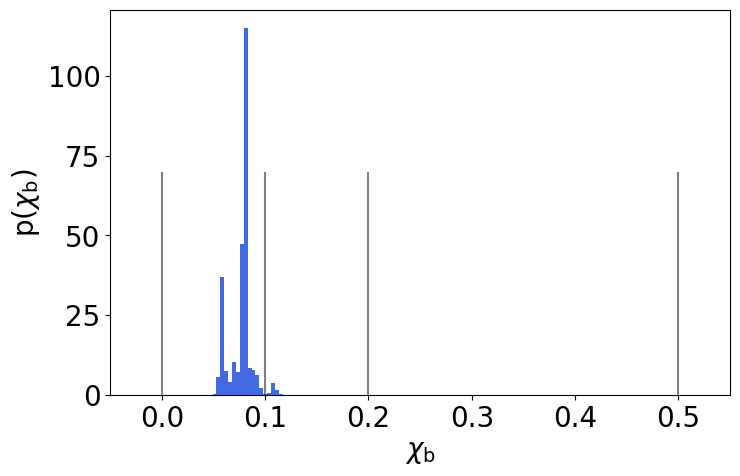

In [6]:
#relative samples in each chi_b
#relative samples in each alpha
plt.rcParams.update({'font.size': 20})
fig = plt.figure(figsize=(8,5))
chib_samps = list(flow_file['model_selection']['samples']['block0_values'][:,0])

plt.hist(chib_samps, density=True, label='flow', color='royalblue', bins=18)
for x in chi_b:
    plt.vlines(x, 0, 70, color='black', alpha=0.5)
#plt.ylim(0,70)
plt.xlim(-0.05,.55)
label = '$\chi_{\mathrm{b}}$'
plt.xlabel(r'$\chi_{\mathrm{b}}$')
plt.ylabel(r'p($\chi_{\mathrm{b}}$)')
#plt.savefig('/Users/stormcolloms/Documents/PhD/Project_work/AMAZE_model_selection/rns/Flows_140224_regularisation/plots/alpha_flow_KDEcomp.pdf')
#plt.savefig('/Users/stormcolloms/Documents/PhD/Project_work/AMAZE_model_selection/rns/Flows_140224_regularisation/plots/chib_flow_KDEcomp.pdf')

In [13]:
np.mean(chib_samps)

0.0883554181329784

Text(0, 0.5, 'p($\\alpha_{\\mathrm{CE}}$)')

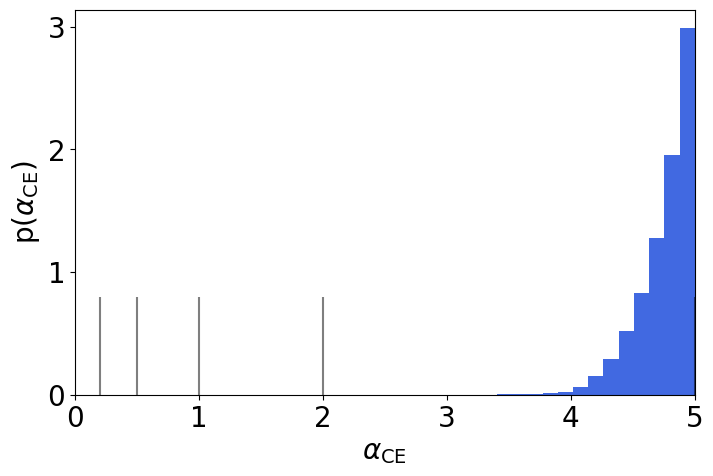

In [7]:
#relative samples in each alpha
plt.rcParams.update({'font.size': 20})
fig = plt.figure(figsize=(8,5))

alpha_samps = list(flow_file['model_selection']['samples']['block0_values'][:,1])

plt.hist(alpha_samps, density=True, label='flow', color='royalblue', bins=20)
for a in alpha:
    plt.vlines(a, 0, 0.8, color='black', alpha=0.5)
#plt.ylim(0,0.8)
plt.xlim(0,5)
label = '$\alpha_{\mathrm{CE}}$'
plt.xlabel(r'$\alpha_{\mathrm{CE}}$')
plt.ylabel(r'p($\alpha_{\mathrm{CE}}$)')
#plt.savefig('/Users/stormcolloms/Documents/PhD/Project_work/AMAZE_model_selection/rns/Flows_140224_regularisation/plots/alpha_flow_KDEcomp.pdf')

In [9]:
np.mean(alpha_samps)

4.010354551706366

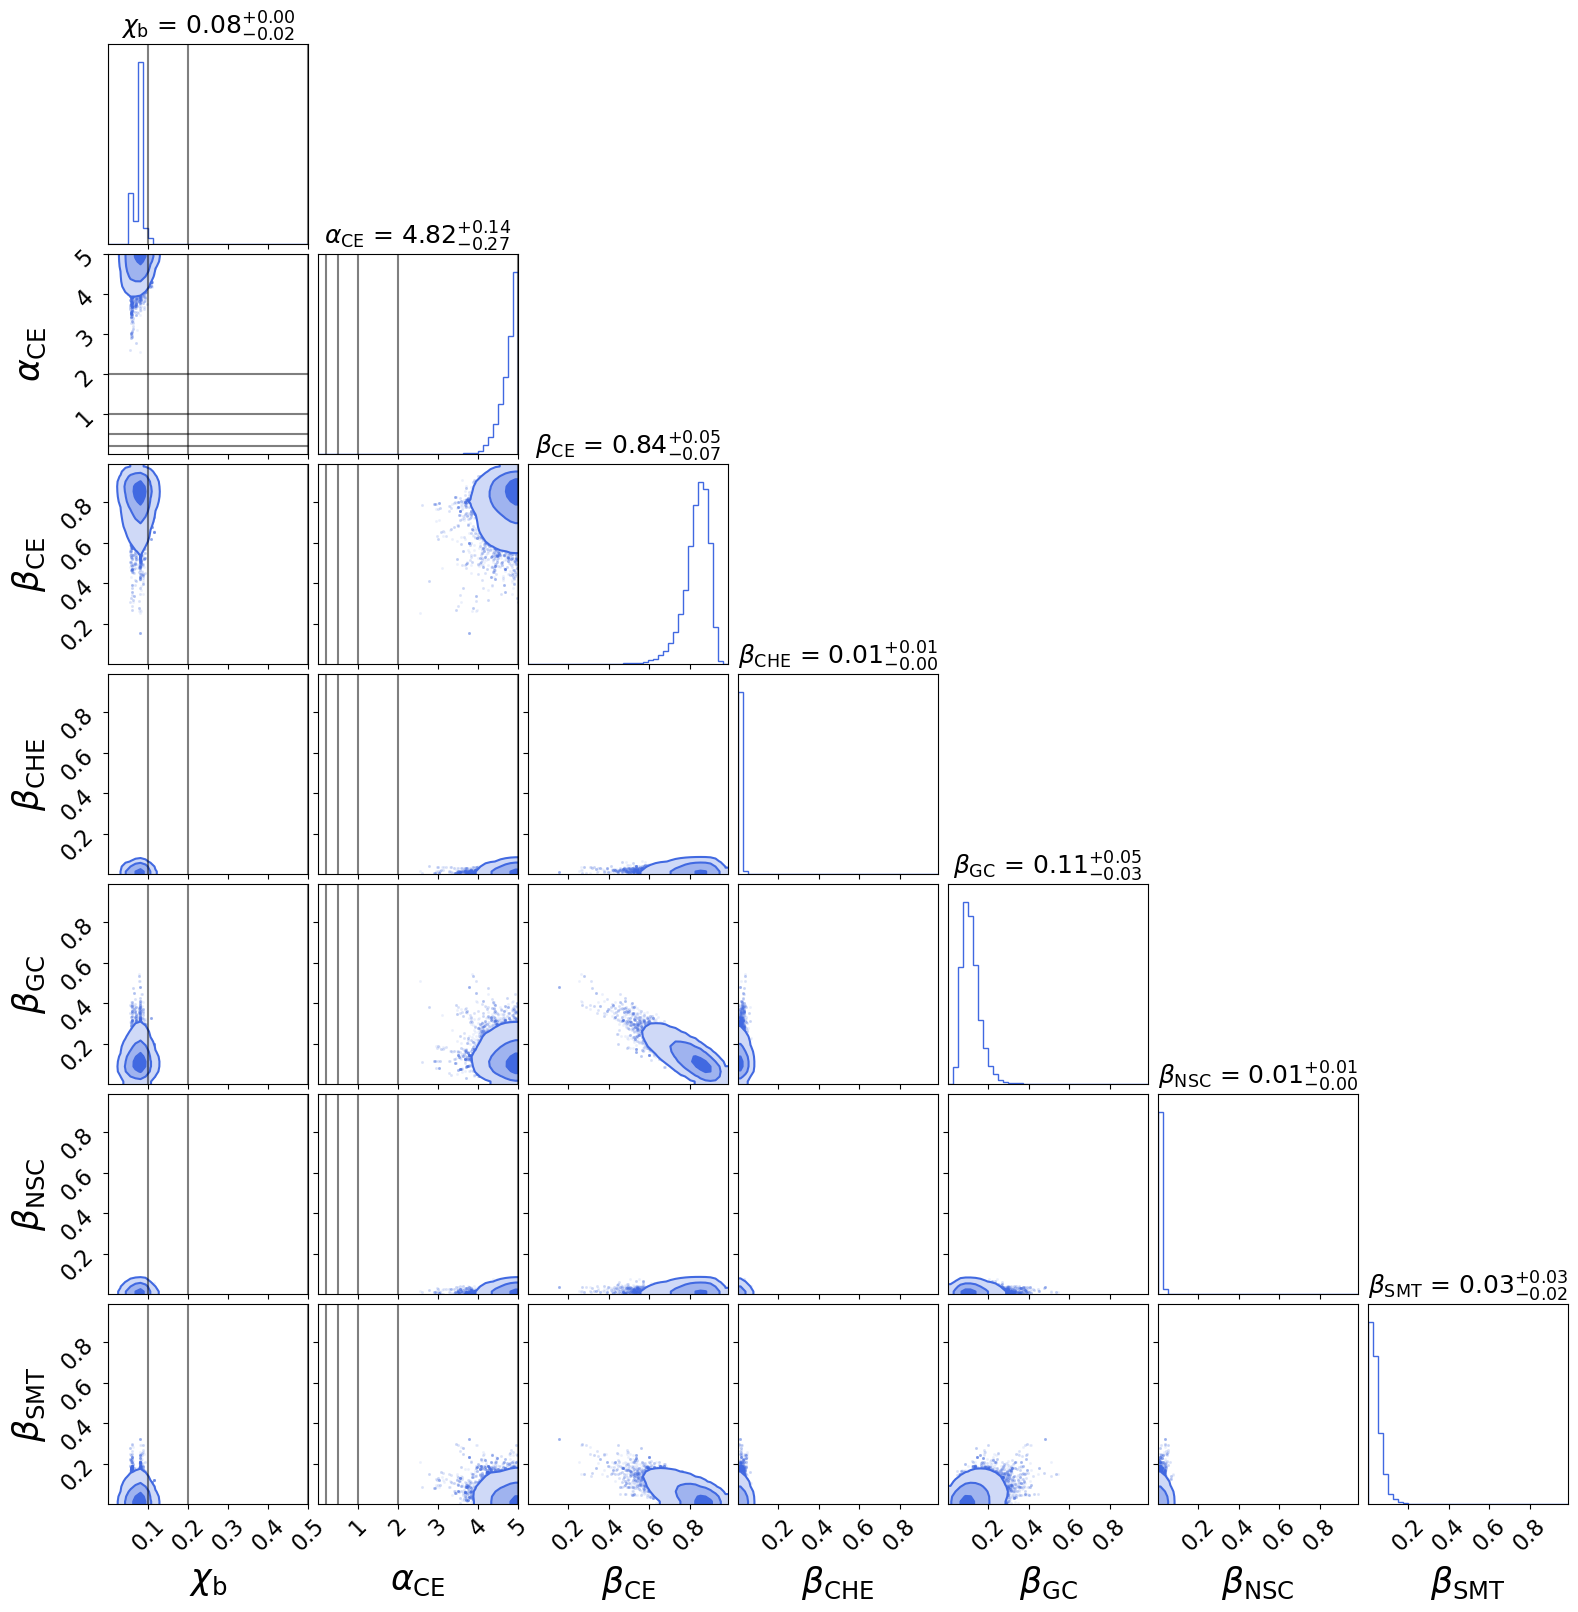

In [5]:
#corner plots of betas
plt.rcParams.update({'font.size': 16})


corner_kwargs = dict(
    bins=40,
    smooth=0.9,
    color="royalblue",
    #quantiles=[0.16, 0.84],
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.0)),
    plot_density=True,
    plot_datapoints=True,
    fill_contours=True,
    show_titles=True,
    hist_kwargs=dict(density=True),
    label_kwargs=dict(fontsize=25),
    title_kwargs=dict(fontsize=18),
    labels=[r'$\chi_\mathrm{b}$', r'$\alpha_{\mathrm{CE}}$',r'$\beta_{\mathrm{CE}}$',r'$\beta_{\mathrm{CHE}}$',r'$\beta_{\mathrm{GC}}$',r'$\beta_{\mathrm{NSC}}$',r'$\beta_{\mathrm{SMT}}$'],
    range = [(0.,.5),(0.,5.),(0.,.99),(0.,.99),(0.,.99),(0.,.99),(0.,.99)]
)

files_lowreg = ['Flows_260624_contGwtc310000Nsamp/output_seed12.hdf5',
 'Flows_260624_contGwtc310000Nsamp/output_seed89.hdf5',
 'Flows_260624_contGwtc310000Nsamp/output.hdf5']

for a in alpha:
    corner.overplot_lines(fig_data, [None, a, None, None, None, None, None], color='black', alpha=0.5)
#fig_data = corner.corner(dirichlet.pdf(np.ones(5)*0.2, np.ones(5)), fig=fig_data, **corner_kwargs_kde)
#fig_data.savefig('/Users/stormcolloms/Documents/PhD/Project_work/AMAZE_model_selection/rns/Flows_200324_contcorrectalpha/plots/full_posteriors_corner_cont.pdf')

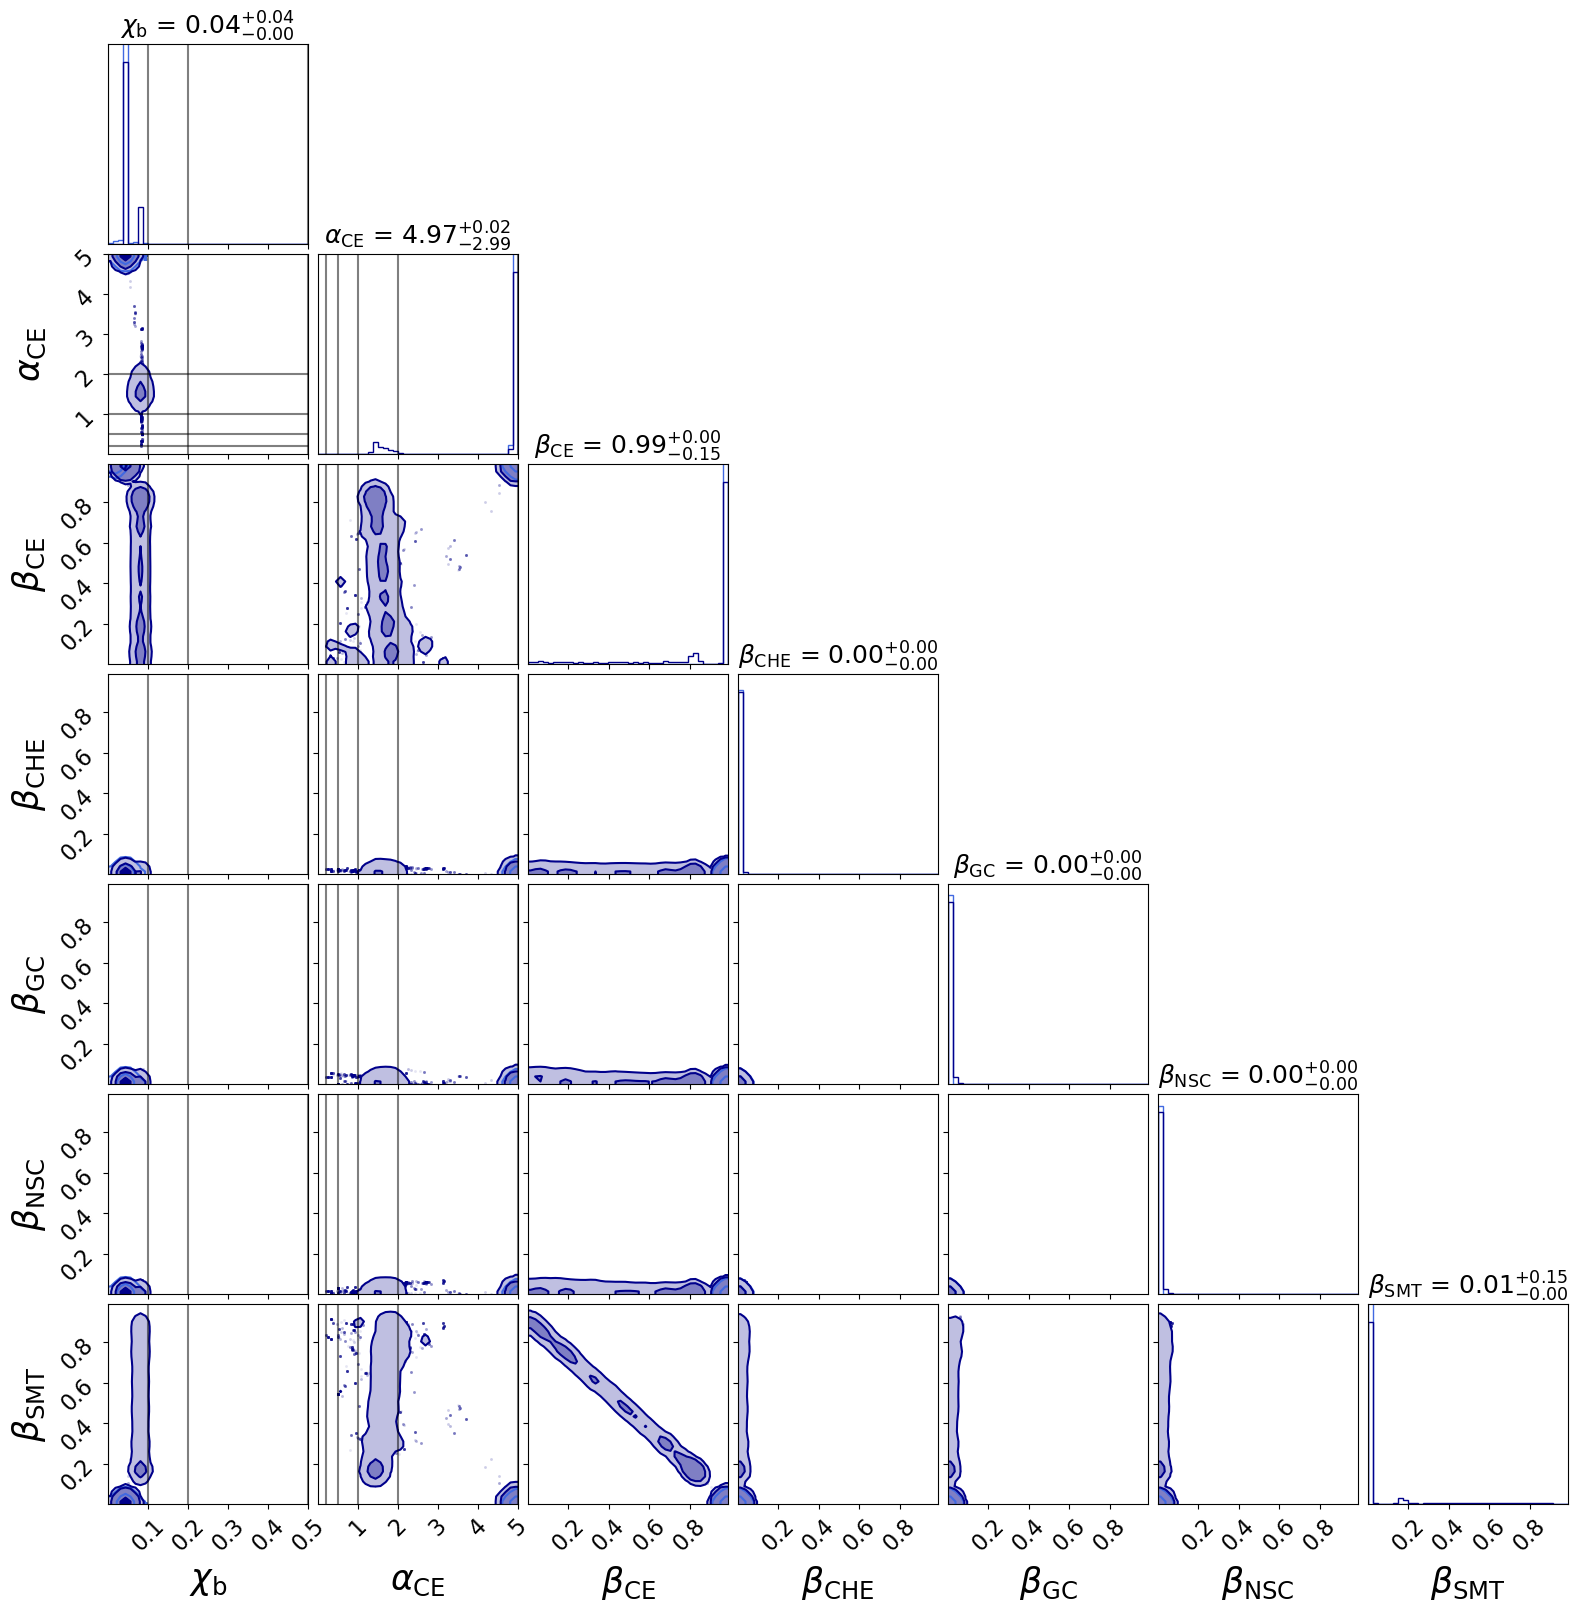

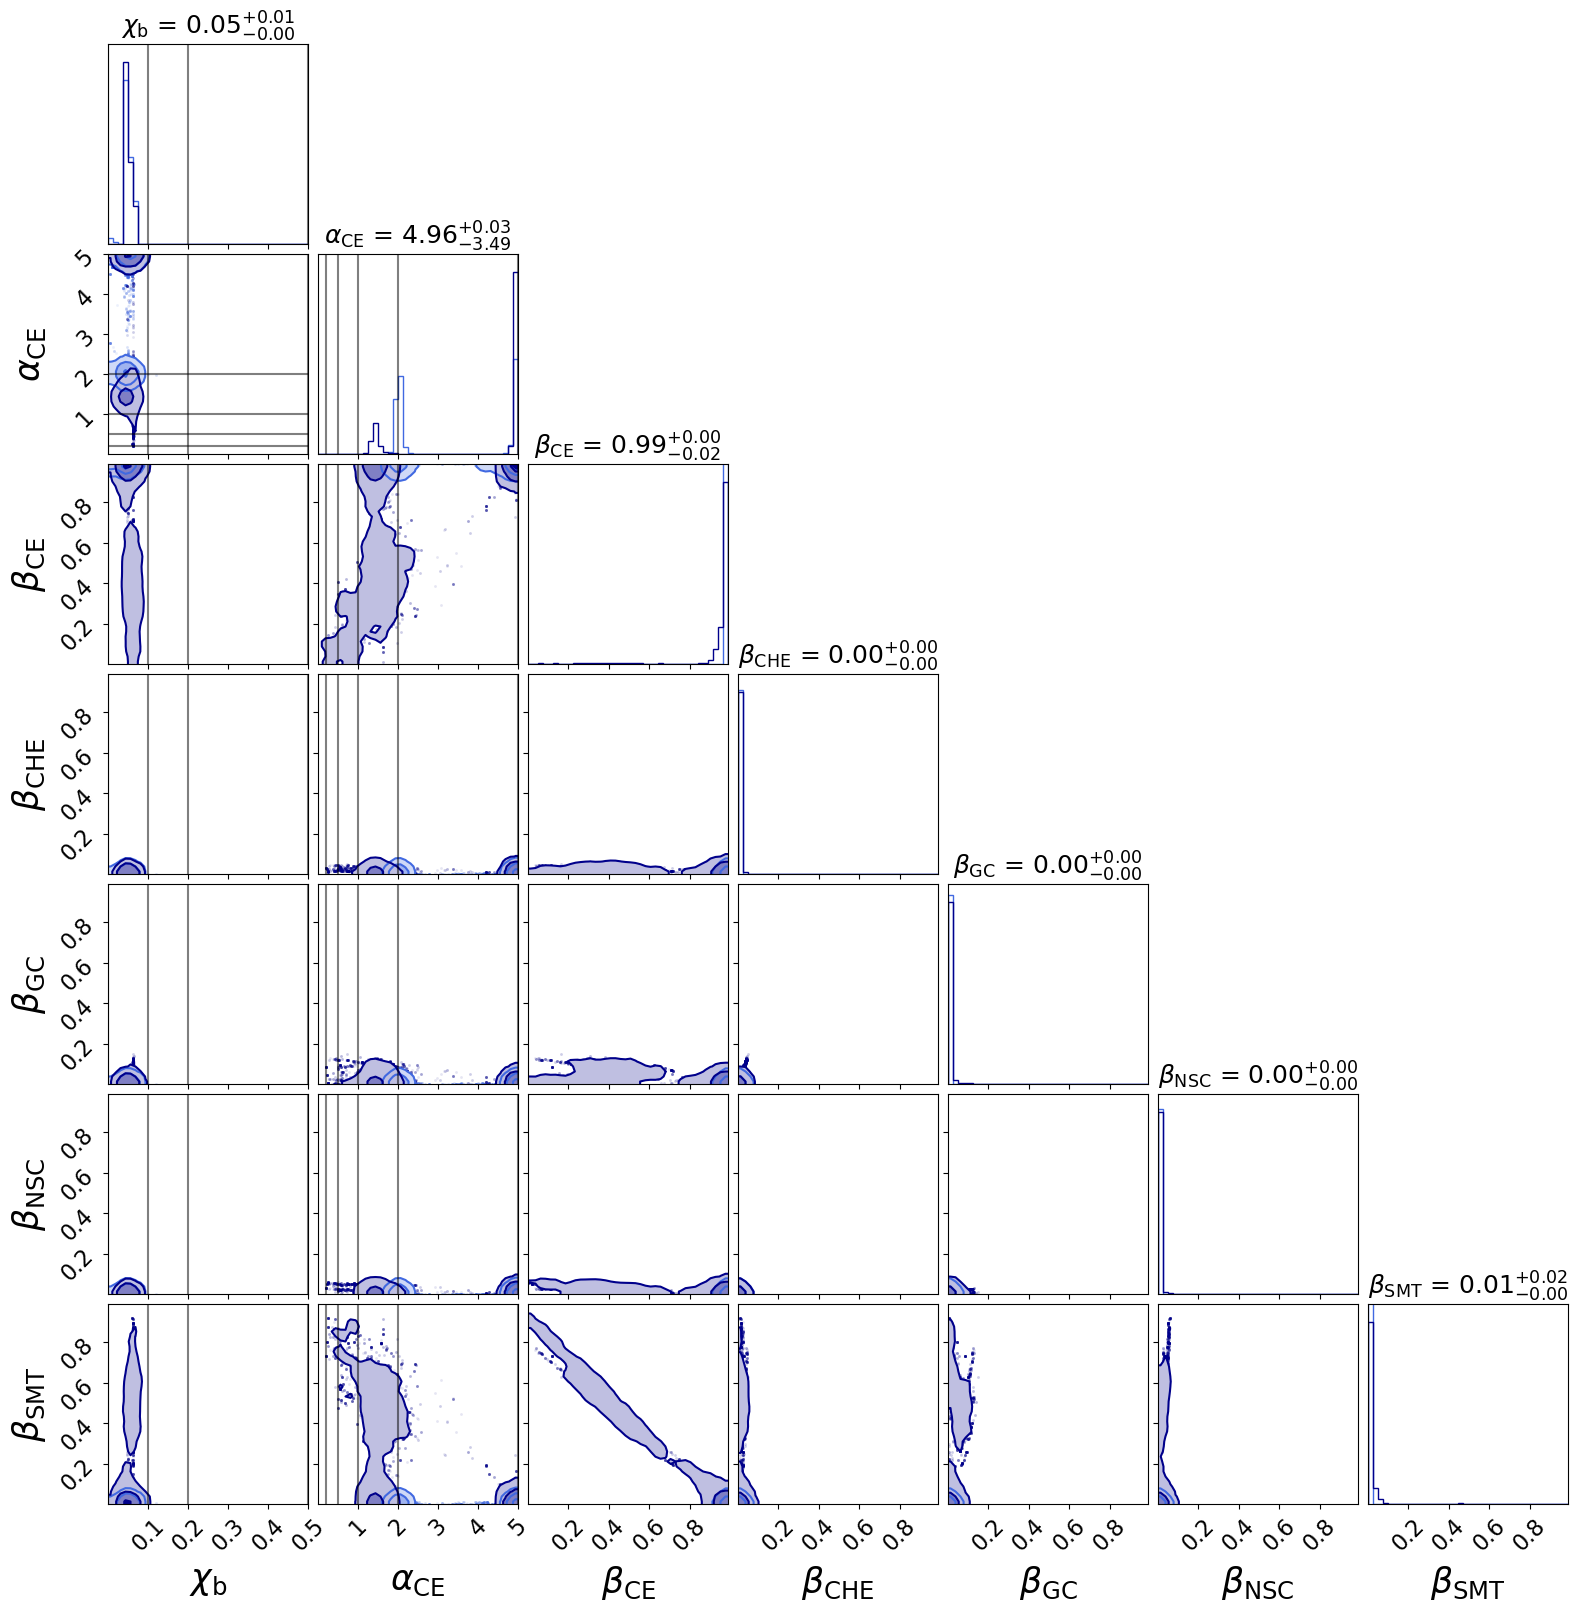

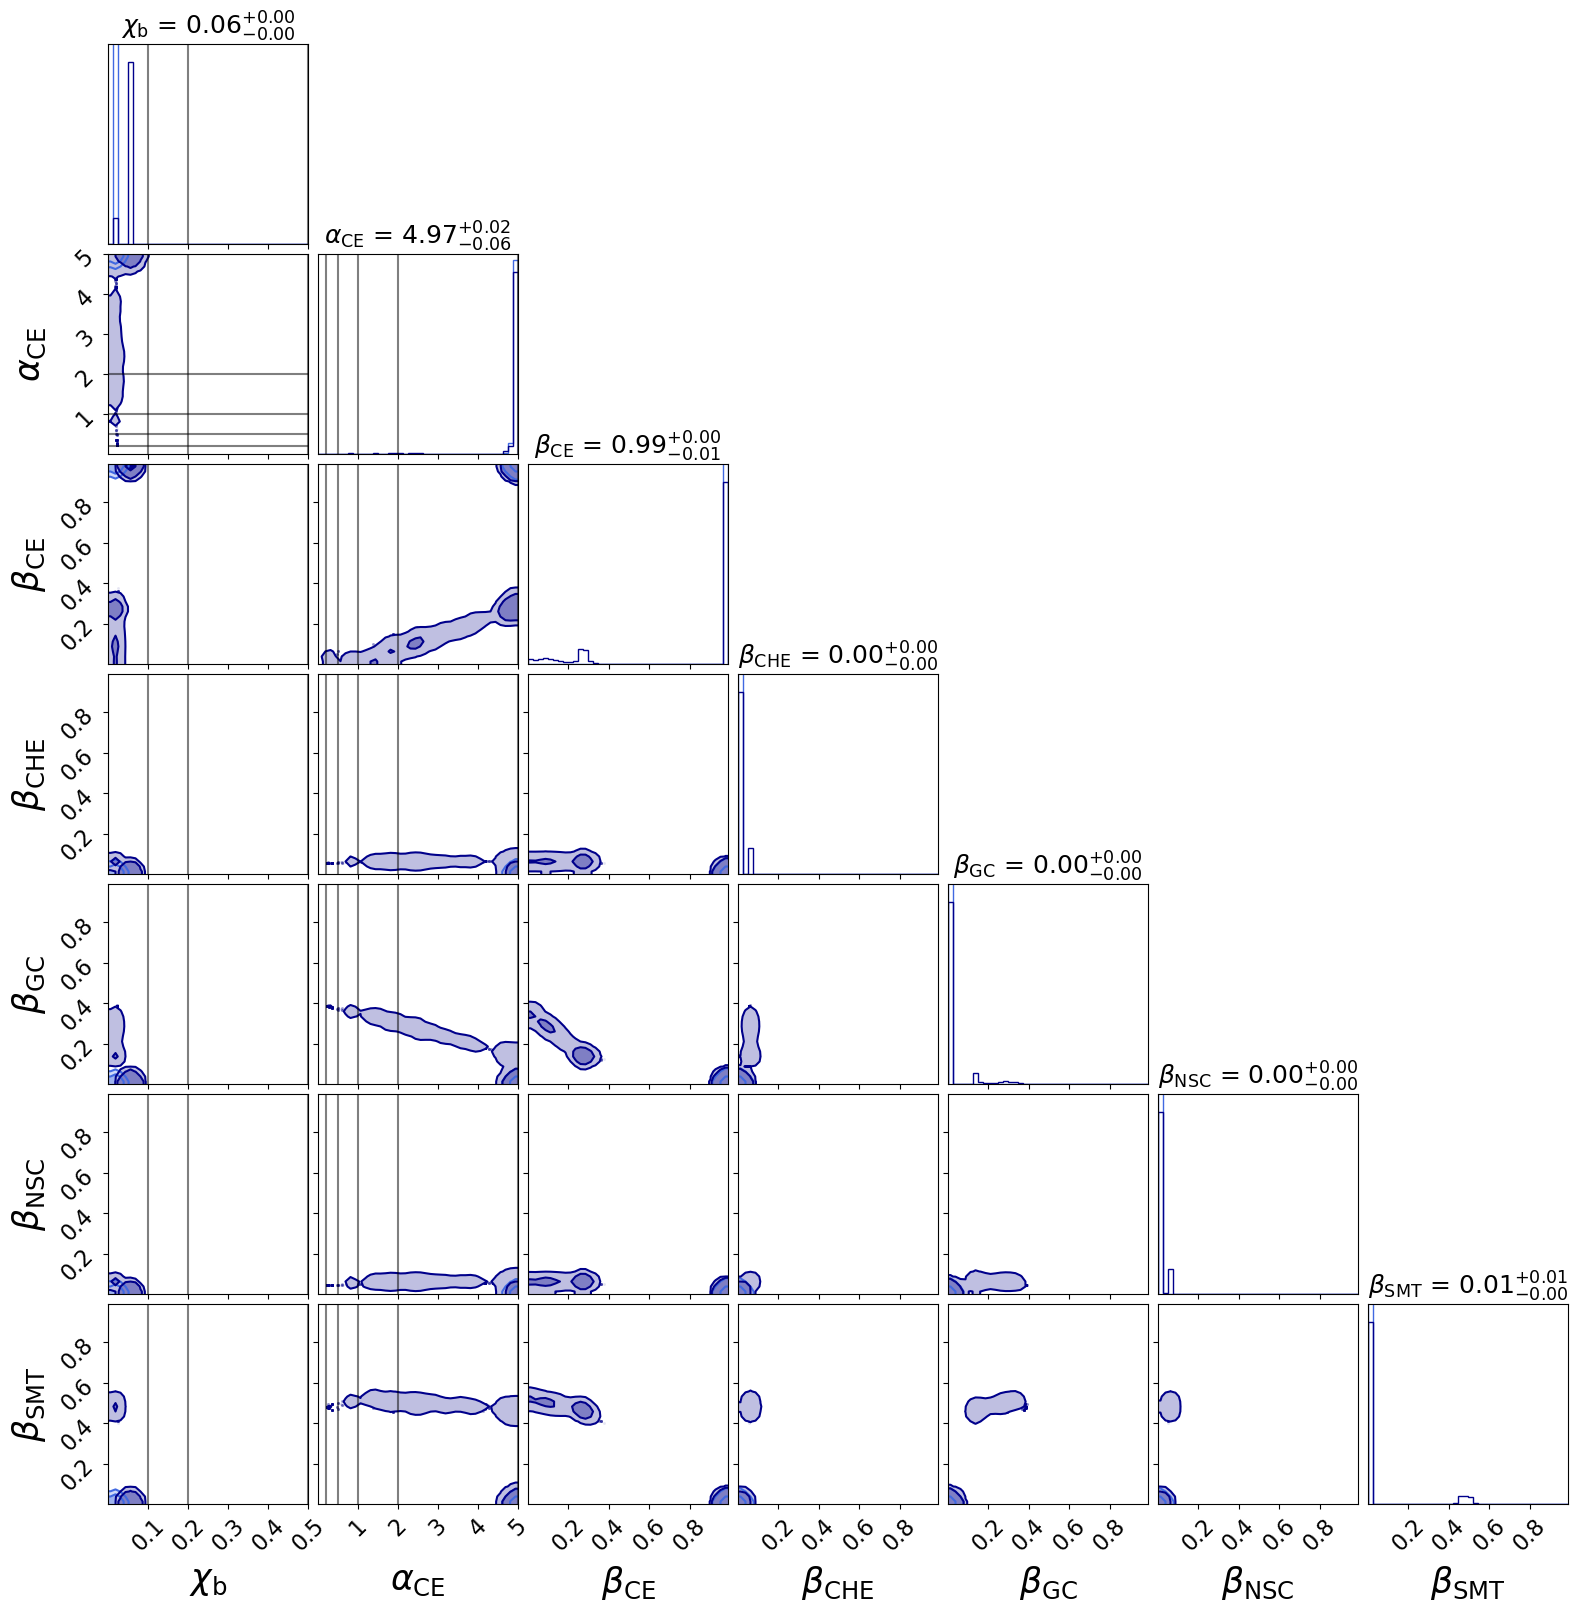

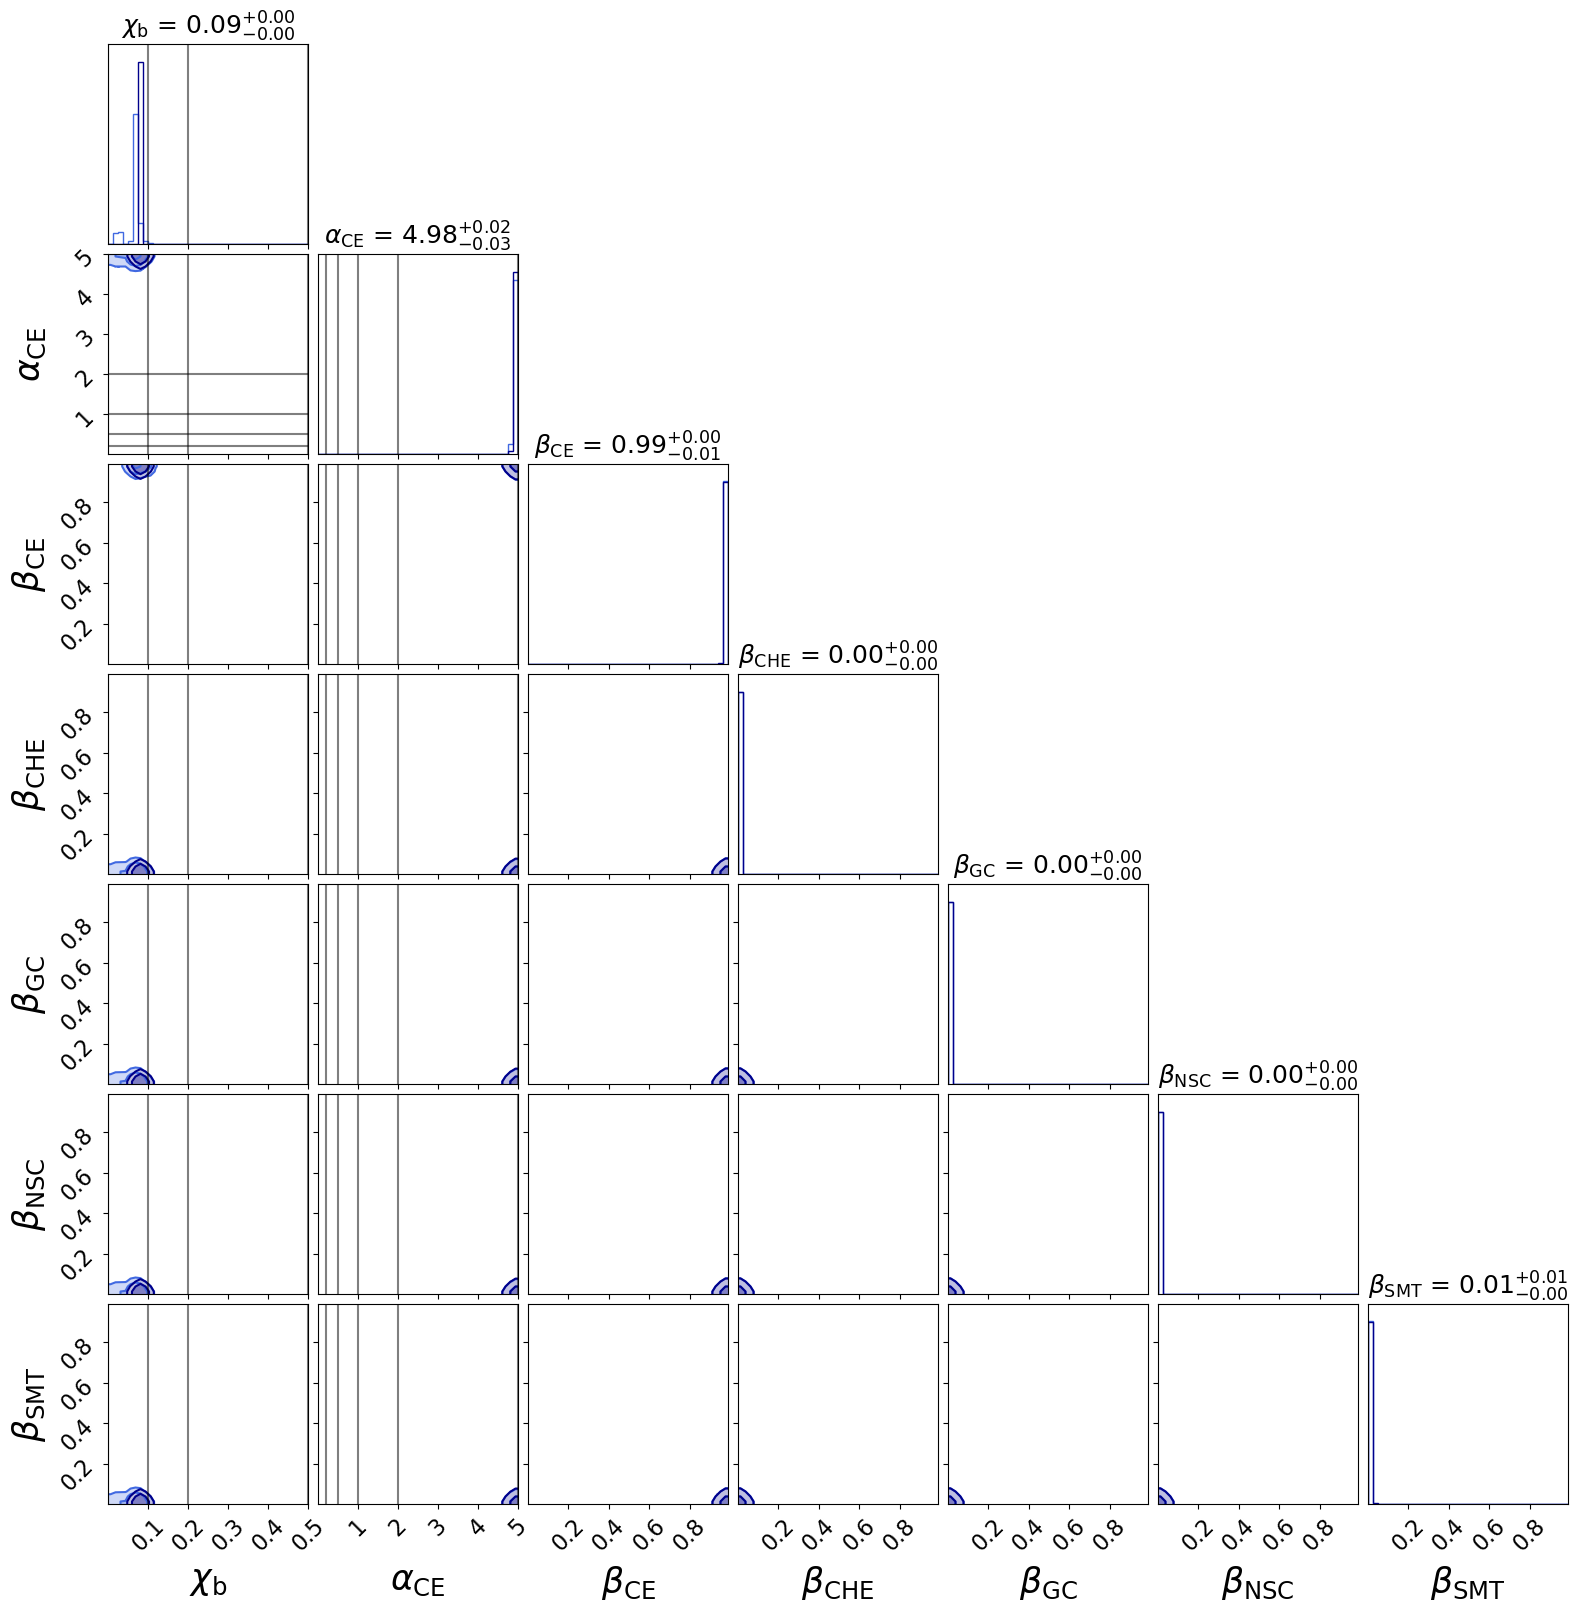

In [4]:
#corner plots of betas
plt.rcParams.update({'font.size': 16})


corner_kwargs = dict(
    bins=40,
    smooth=0.9,
    color="royalblue",
    #quantiles=[0.16, 0.84],
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.0)),
    plot_density=True,
    plot_datapoints=True,
    fill_contours=True,
    show_titles=True,
    hist_kwargs=dict(density=True),
    label_kwargs=dict(fontsize=25),
    title_kwargs=dict(fontsize=18),
    labels=[r'$\chi_\mathrm{b}$', r'$\alpha_{\mathrm{CE}}$',r'$\beta_{\mathrm{CE}}$',r'$\beta_{\mathrm{CHE}}$',r'$\beta_{\mathrm{GC}}$',r'$\beta_{\mathrm{NSC}}$',r'$\beta_{\mathrm{SMT}}$'],
    range = [(0.,.5),(0.,5.),(0.,.99),(0.,.99),(0.,.99),(0.,.99),(0.,.99)]
)
kwargs_lowreg = dict(
    bins=40,
    smooth=0.9,
    color="darkblue",
    #quantiles=[0.16, 0.84],
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.0)),
    plot_density=True,
    plot_datapoints=True,
    fill_contours=True,
    show_titles=True,
    hist_kwargs=dict(density=True),
    label_kwargs=dict(fontsize=25),
    title_kwargs=dict(fontsize=18),
    labels=[r'$\chi_\mathrm{b}$', r'$\alpha_{\mathrm{CE}}$',r'$\beta_{\mathrm{CE}}$',r'$\beta_{\mathrm{CHE}}$',r'$\beta_{\mathrm{GC}}$',r'$\beta_{\mathrm{NSC}}$',r'$\beta_{\mathrm{SMT}}$'],
    range = [(0.,.5),(0.,5.),(0.,.99),(0.,.99),(0.,.99),(0.,.99),(0.,.99)]
)


files_lowreg = [
 'Flows_240724_noprior0cont/output_seed89.hdf5',
 'Flows_240724_noprior0cont/output_seed314.hdf5',
 'Flows_240724_noprior0cont/output.hdf5',
 'Flows_240724_noprior0cont/output_seed12.hdf5']

for i, filename in enumerate(glob.glob('/data/wiay/2297403c/amaze_model_select/AMAZE_model_selection/rns/Flows_240724_noprior0cont/*_highreg.hdf5')):

    file = h5py.File(filename, 'r')
    file_lowreg = h5py.File(f'/data/wiay/2297403c/amaze_model_select/AMAZE_model_selection/rns/{files_lowreg[i]}', 'r')
    branching_fracs = np.array(file['model_selection']['samples']['block0_values'])
    fig_seed = corner.corner(branching_fracs, **corner_kwargs)

    branching_fracs_lowreg = np.array(file_lowreg['model_selection']['samples']['block0_values'])
    corner.corner(branching_fracs_lowreg, fig=fig_seed, **kwargs_lowreg)

    for xb in chi_b:
        corner.overplot_lines(fig_seed, [xb, None, None, None, None, None, None], color='black', alpha=0.5)

    for a in alpha:
        corner.overplot_lines(fig_seed, [None, a, None, None, None, None, None], color='black', alpha=0.5)

In [3]:
corner_kwargs = dict(
    bins=40,
    smooth=0.9,
    color="royalblue",
    #quantiles=[0.16, 0.84],
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.0)),
    plot_density=True,
    plot_datapoints=True,
    fill_contours=True,
    show_titles=True,
    hist_kwargs=dict(density=True),
    label_kwargs=dict(fontsize=25),
    title_kwargs=dict(fontsize=18),
    labels=[r'$\chi_\mathrm{b}$', r'$\alpha_{\mathrm{CE}}$',r'$\beta_{\mathrm{CE}}$',r'$\beta_{\mathrm{CHE}}$',r'$\beta_{\mathrm{GC}}$',r'$\beta_{\mathrm{NSC}}$',r'$\beta_{\mathrm{SMT}}$'],
    range = [(0.,.5),(0.,5.),(0.,.99),(0.,.99),(0.,.99),(0.,.99),(0.,.99)]
)

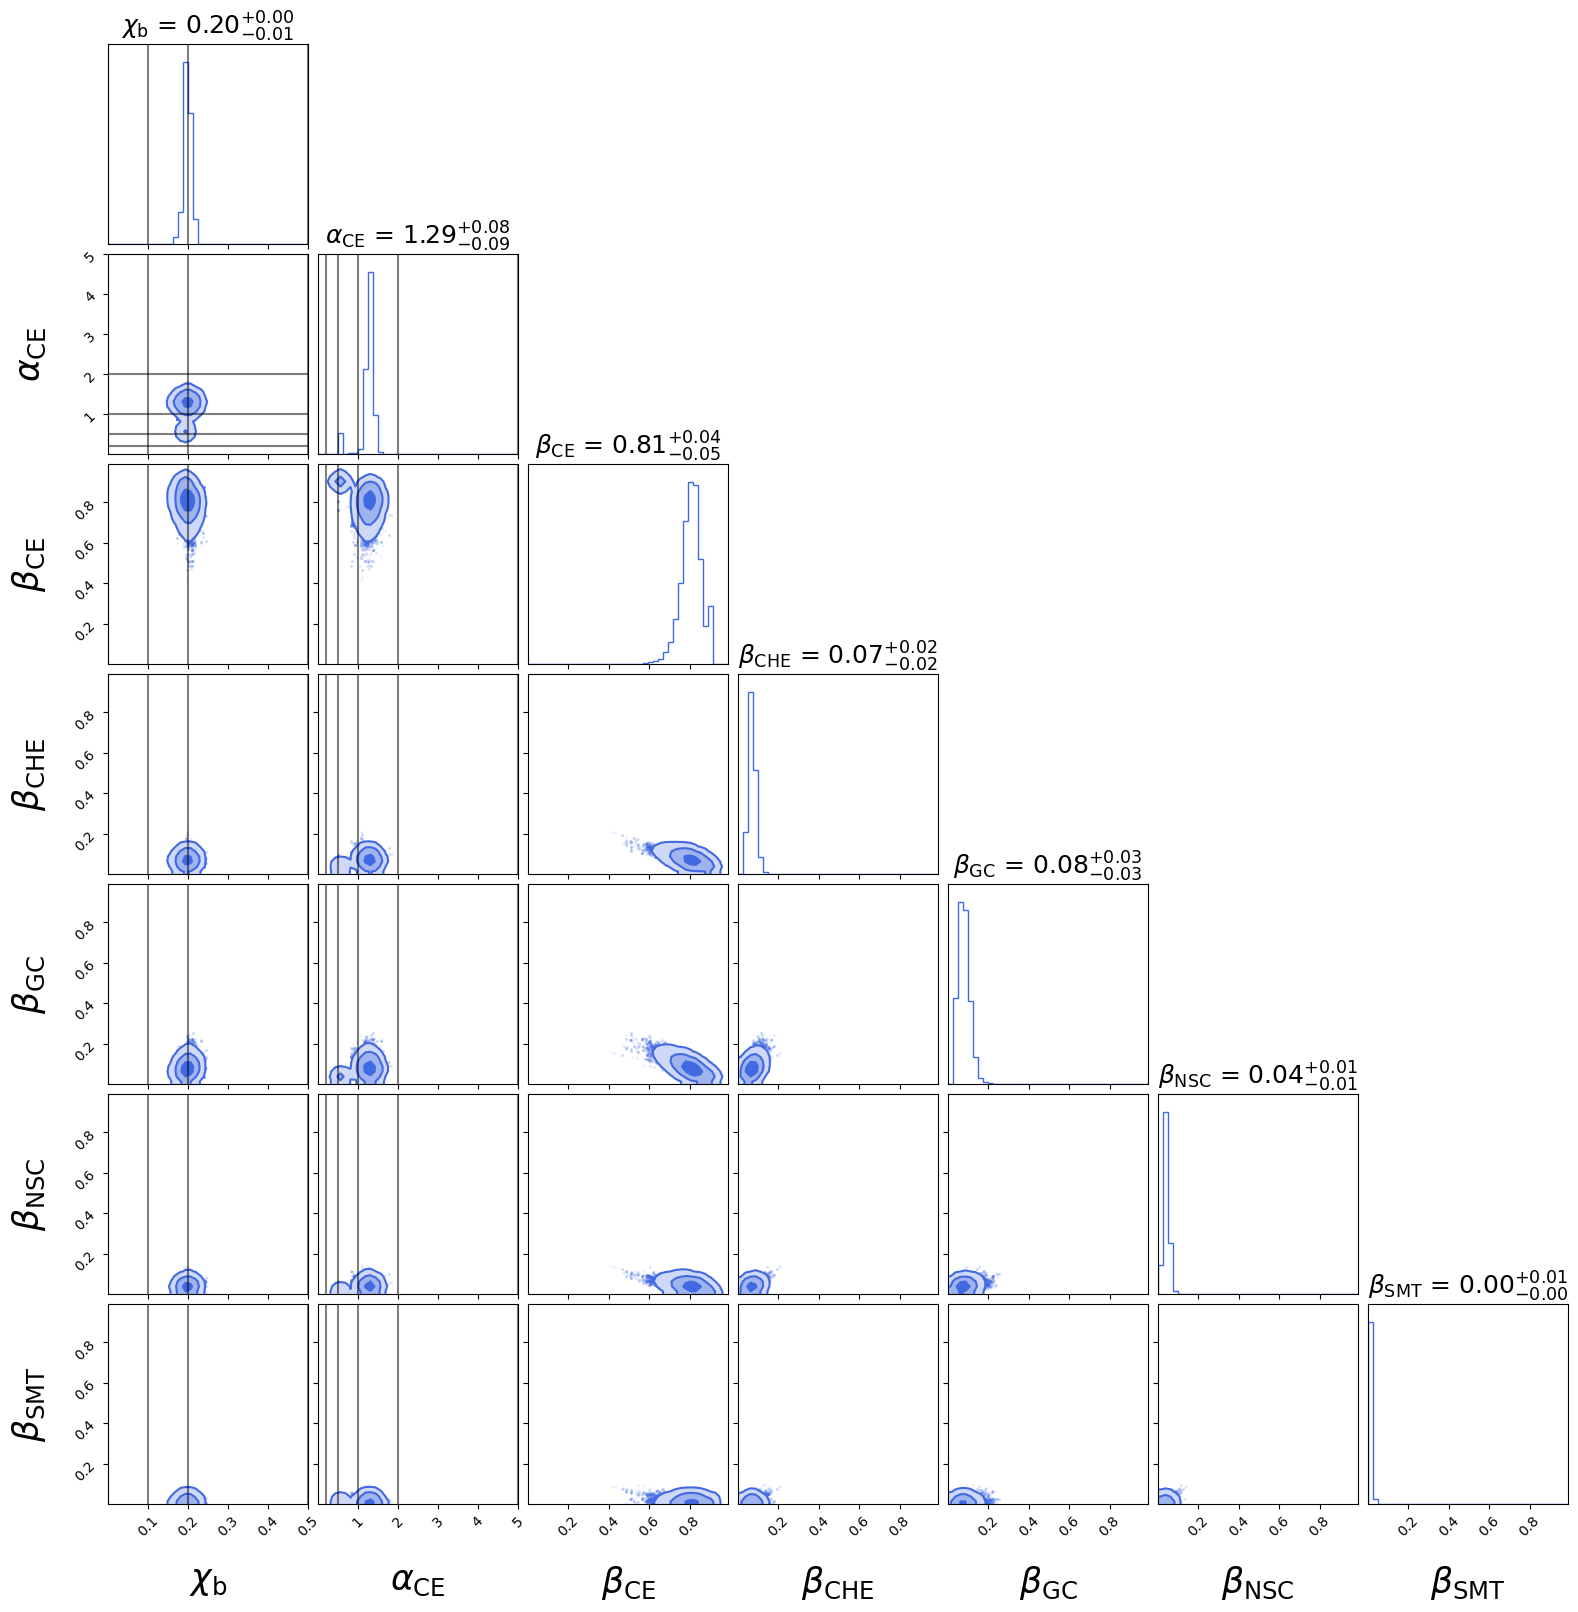

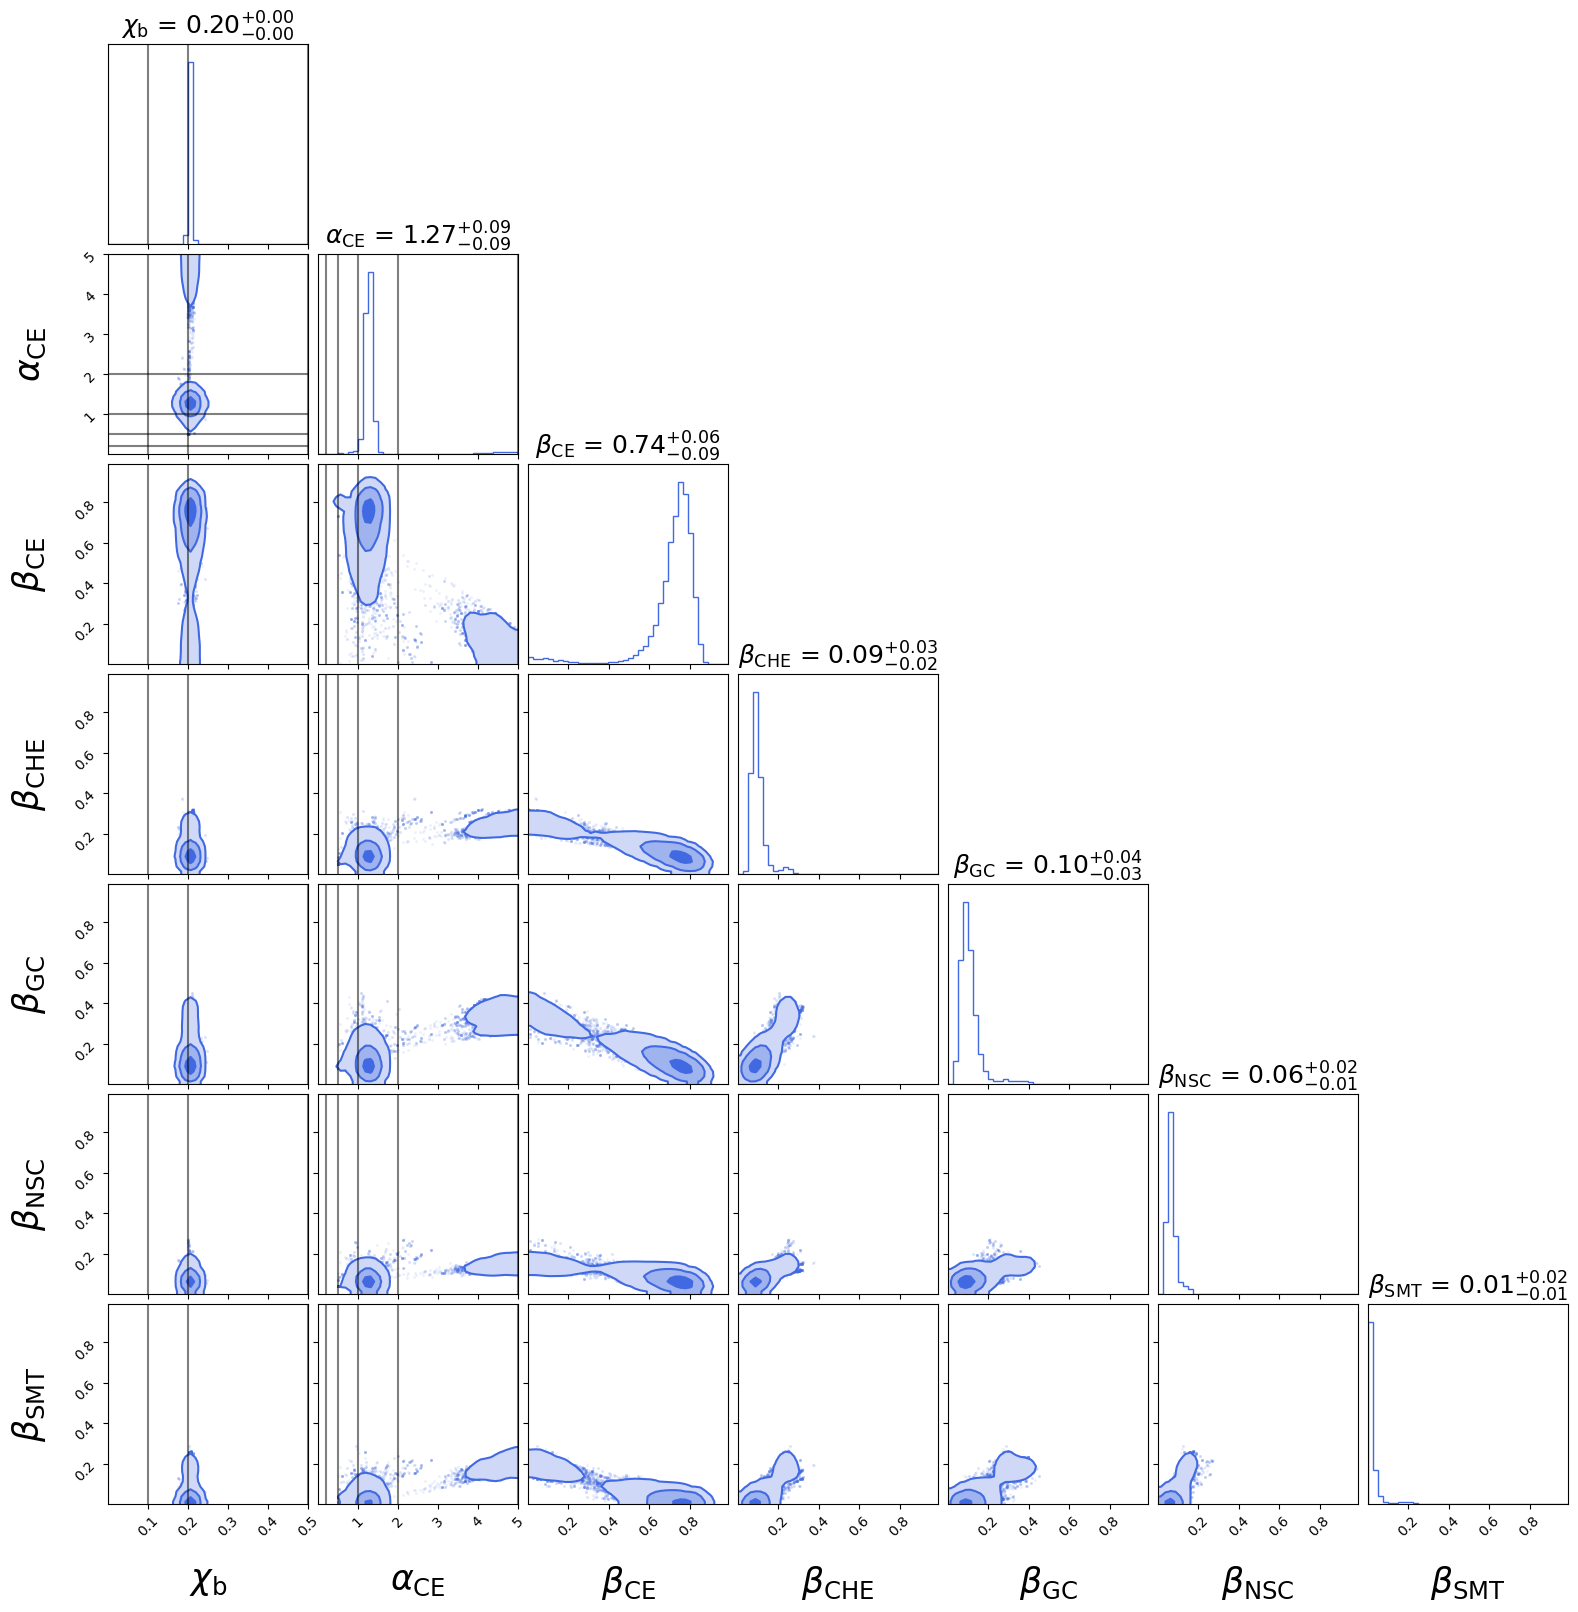

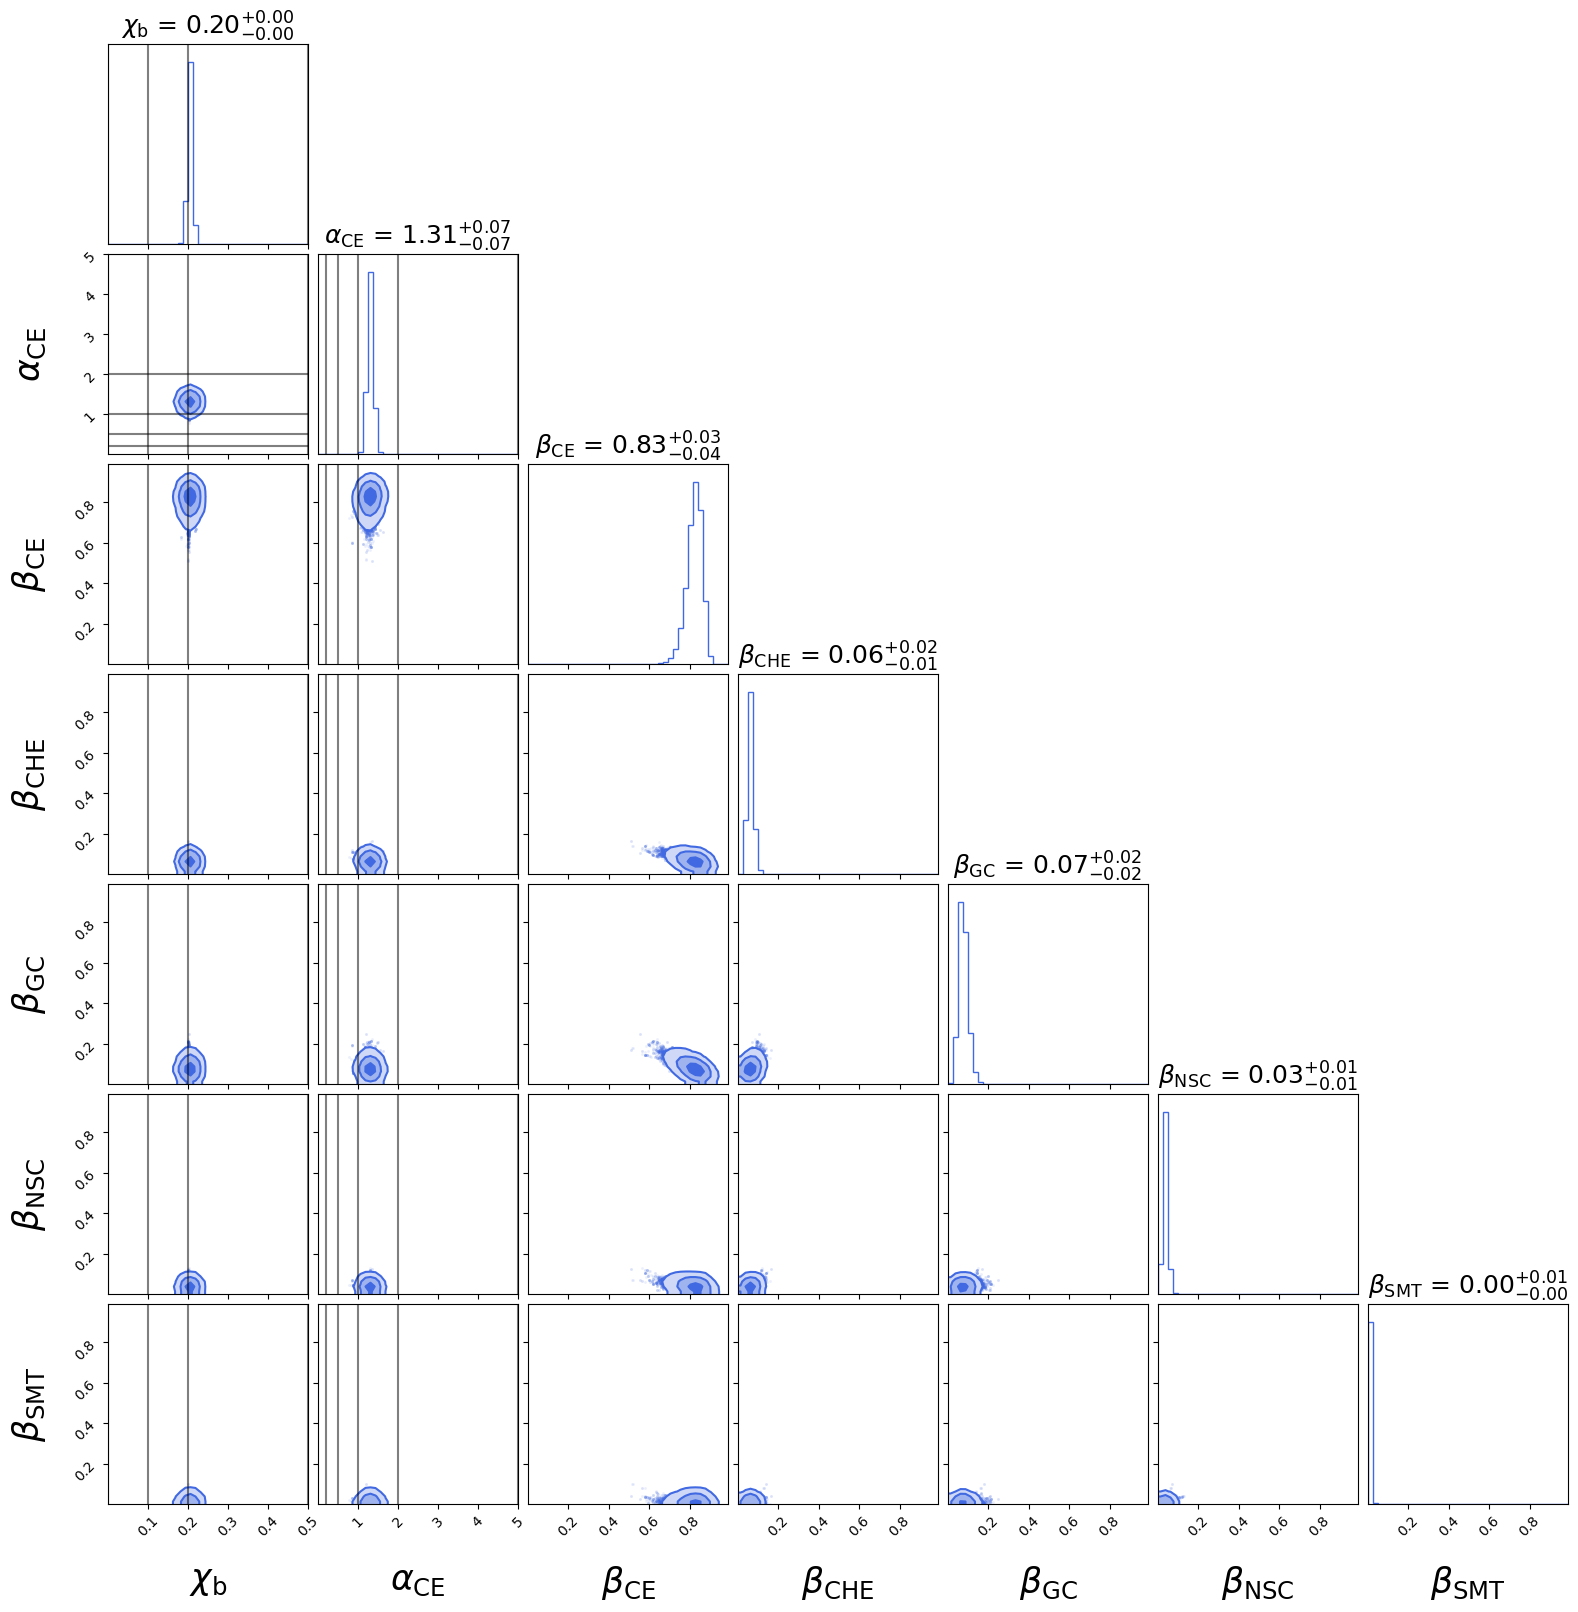

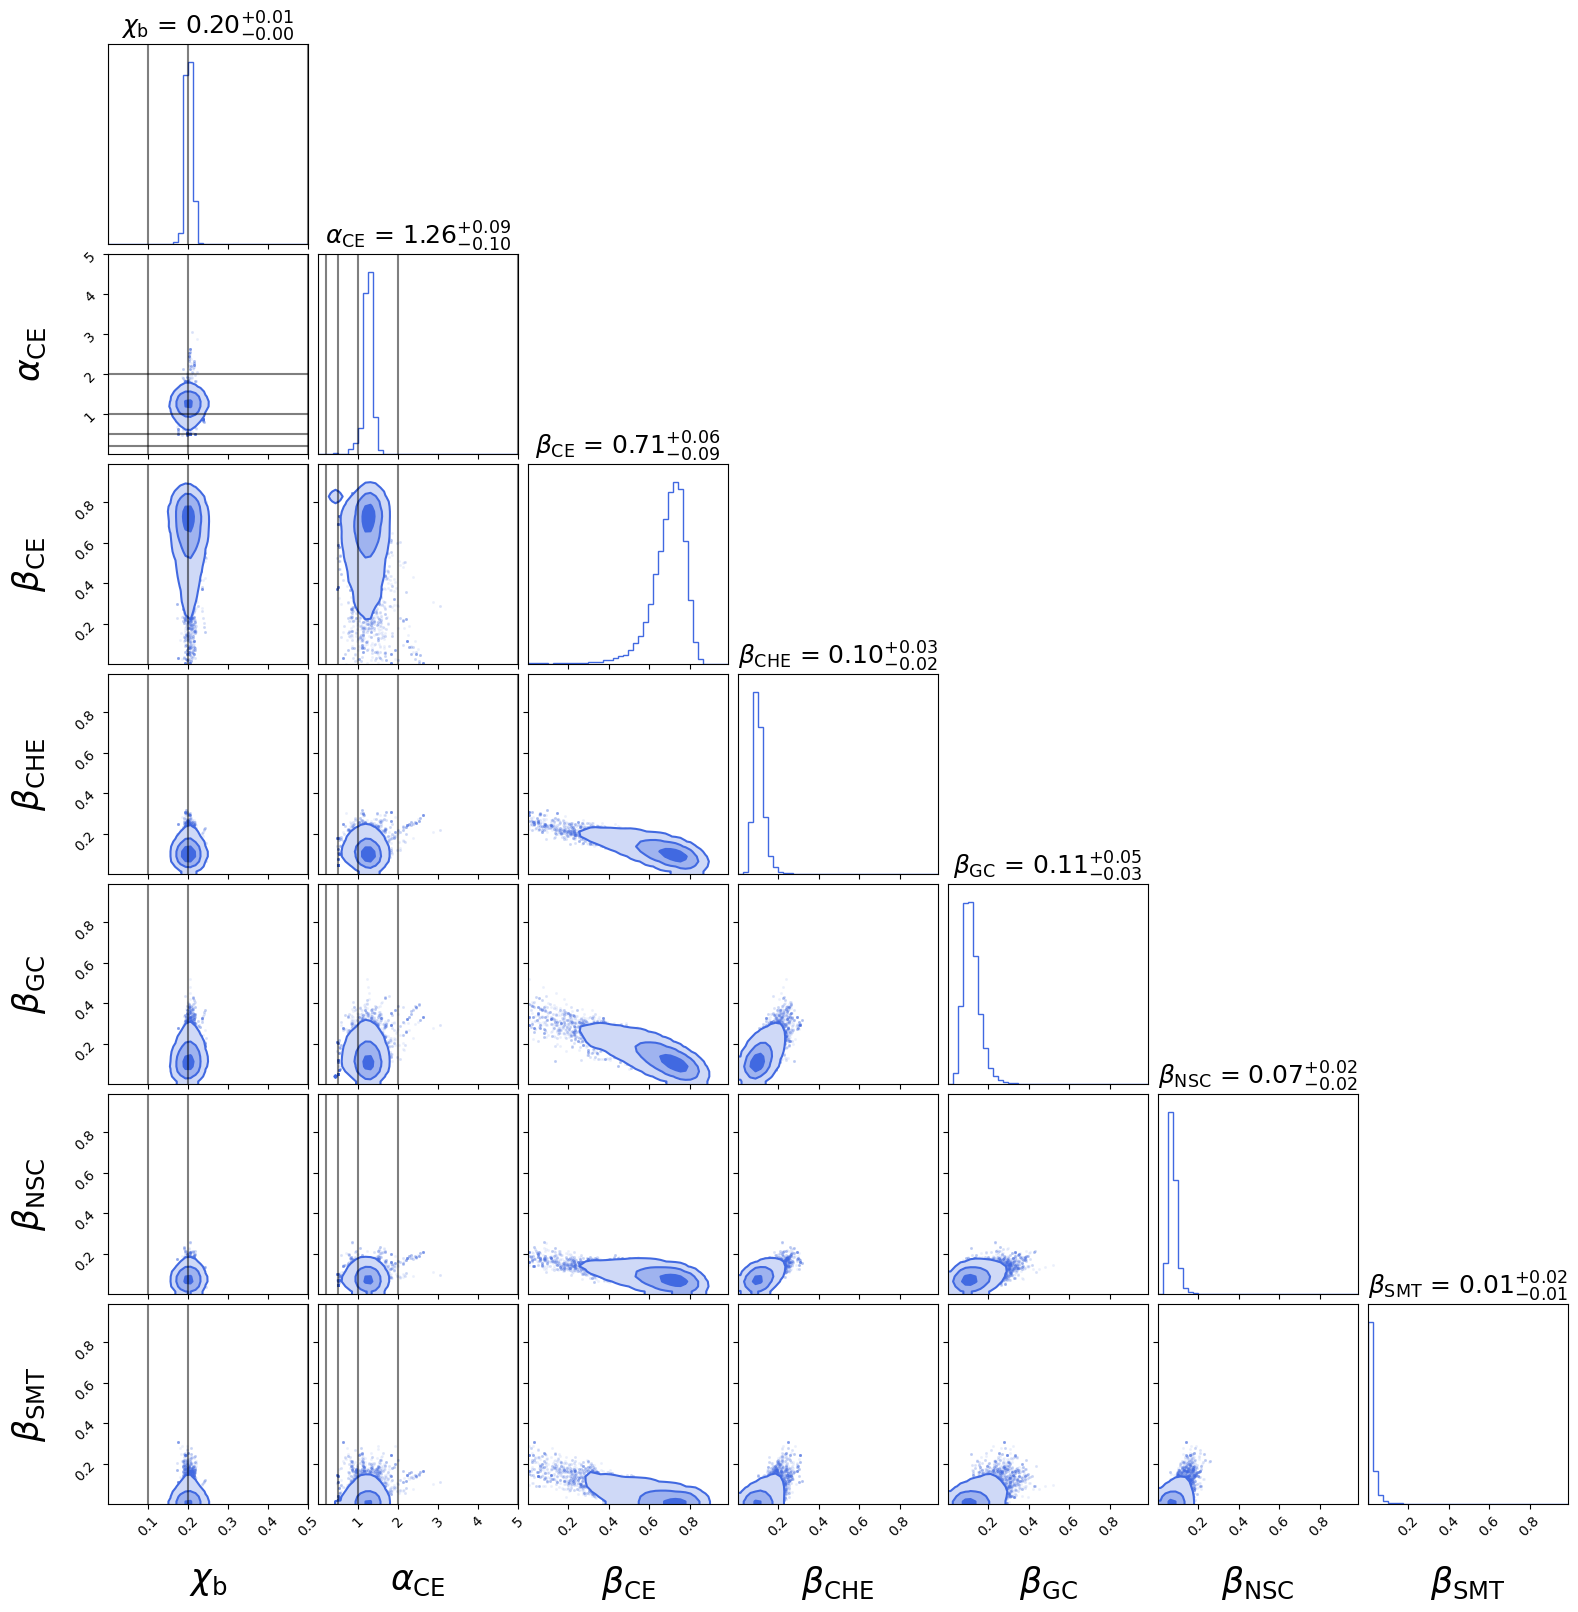

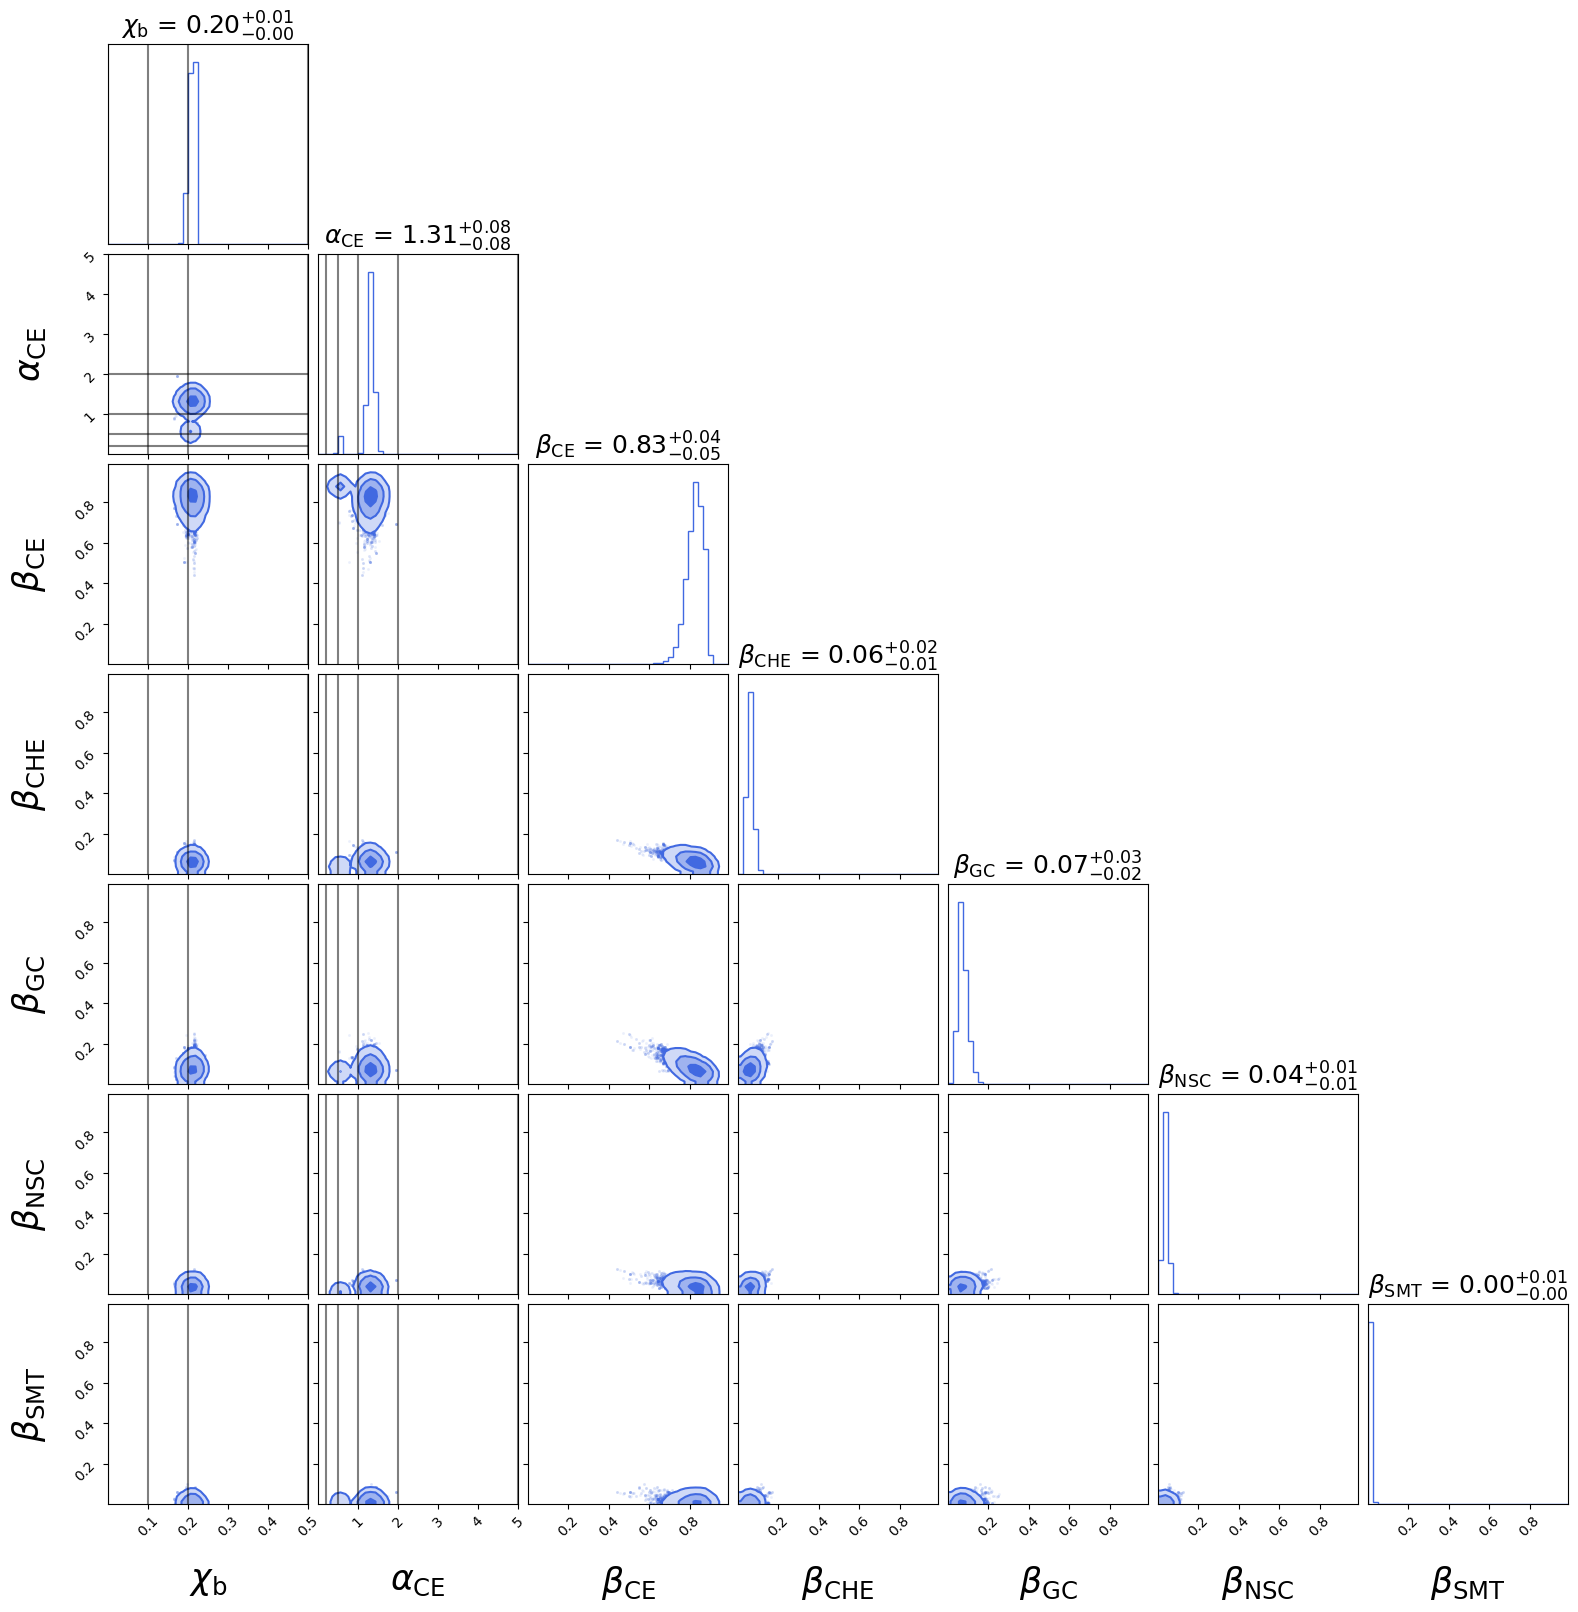

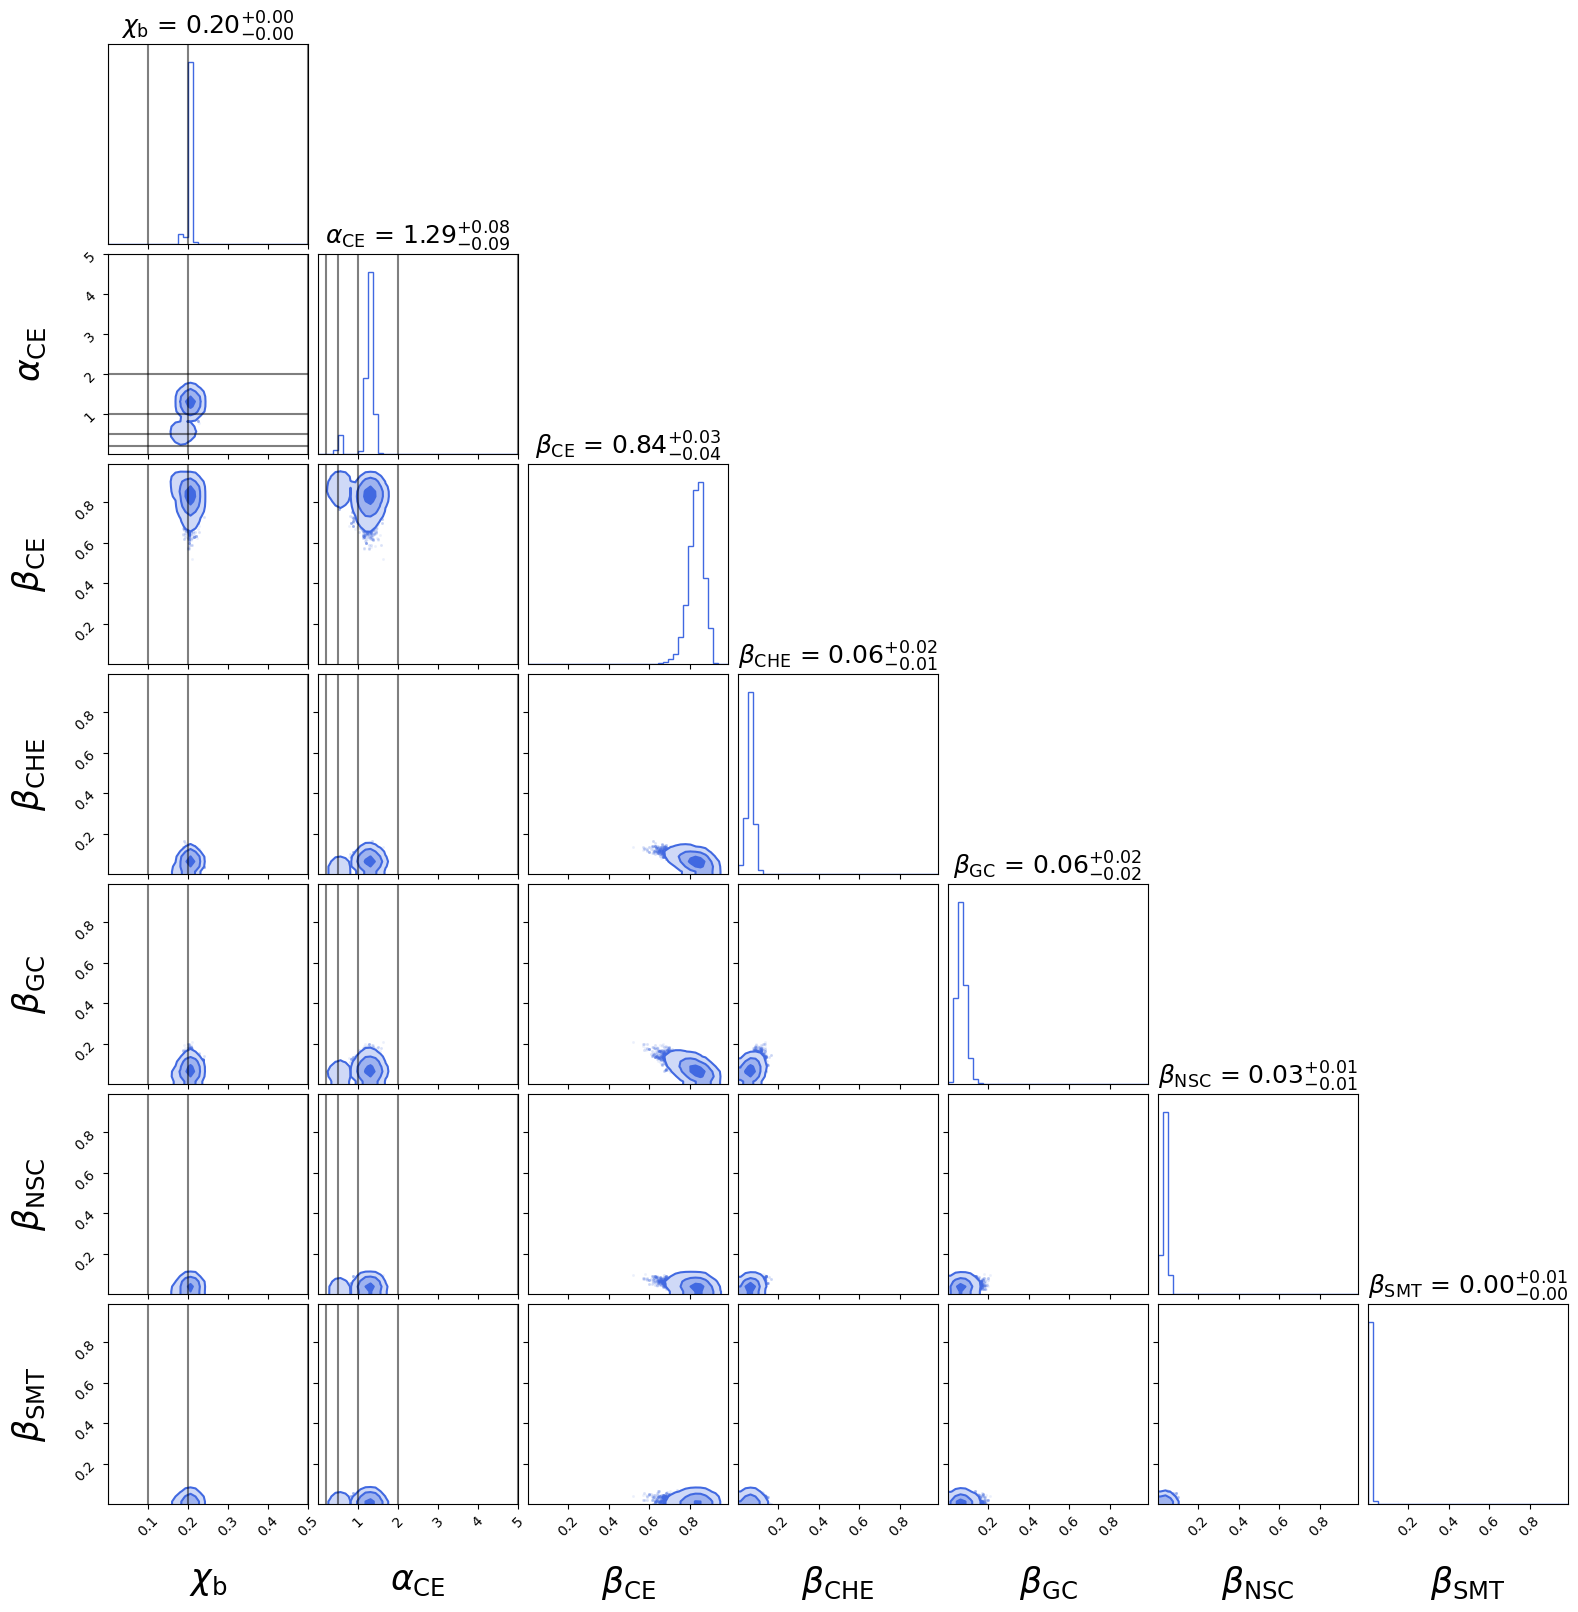

In [4]:
for i, filename in enumerate(glob.glob('/data/wiay/2297403c/amaze_model_select/AMAZE_model_selection/rns/Flows_080724_simevents_chib02/*.hdf5')):
    file = h5py.File(filename, 'r')
    branching_fracs = np.array(file['model_selection']['samples']['block0_values'])
    fig_seed = corner.corner(branching_fracs, **corner_kwargs)


    for xb in chi_b:
        corner.overplot_lines(fig_seed, [xb, None, None, None, None, None, None], color='black', alpha=0.5)

    for a in alpha:
        corner.overplot_lines(fig_seed, [None, a, None, None, None, None, None], color='black', alpha=0.5)

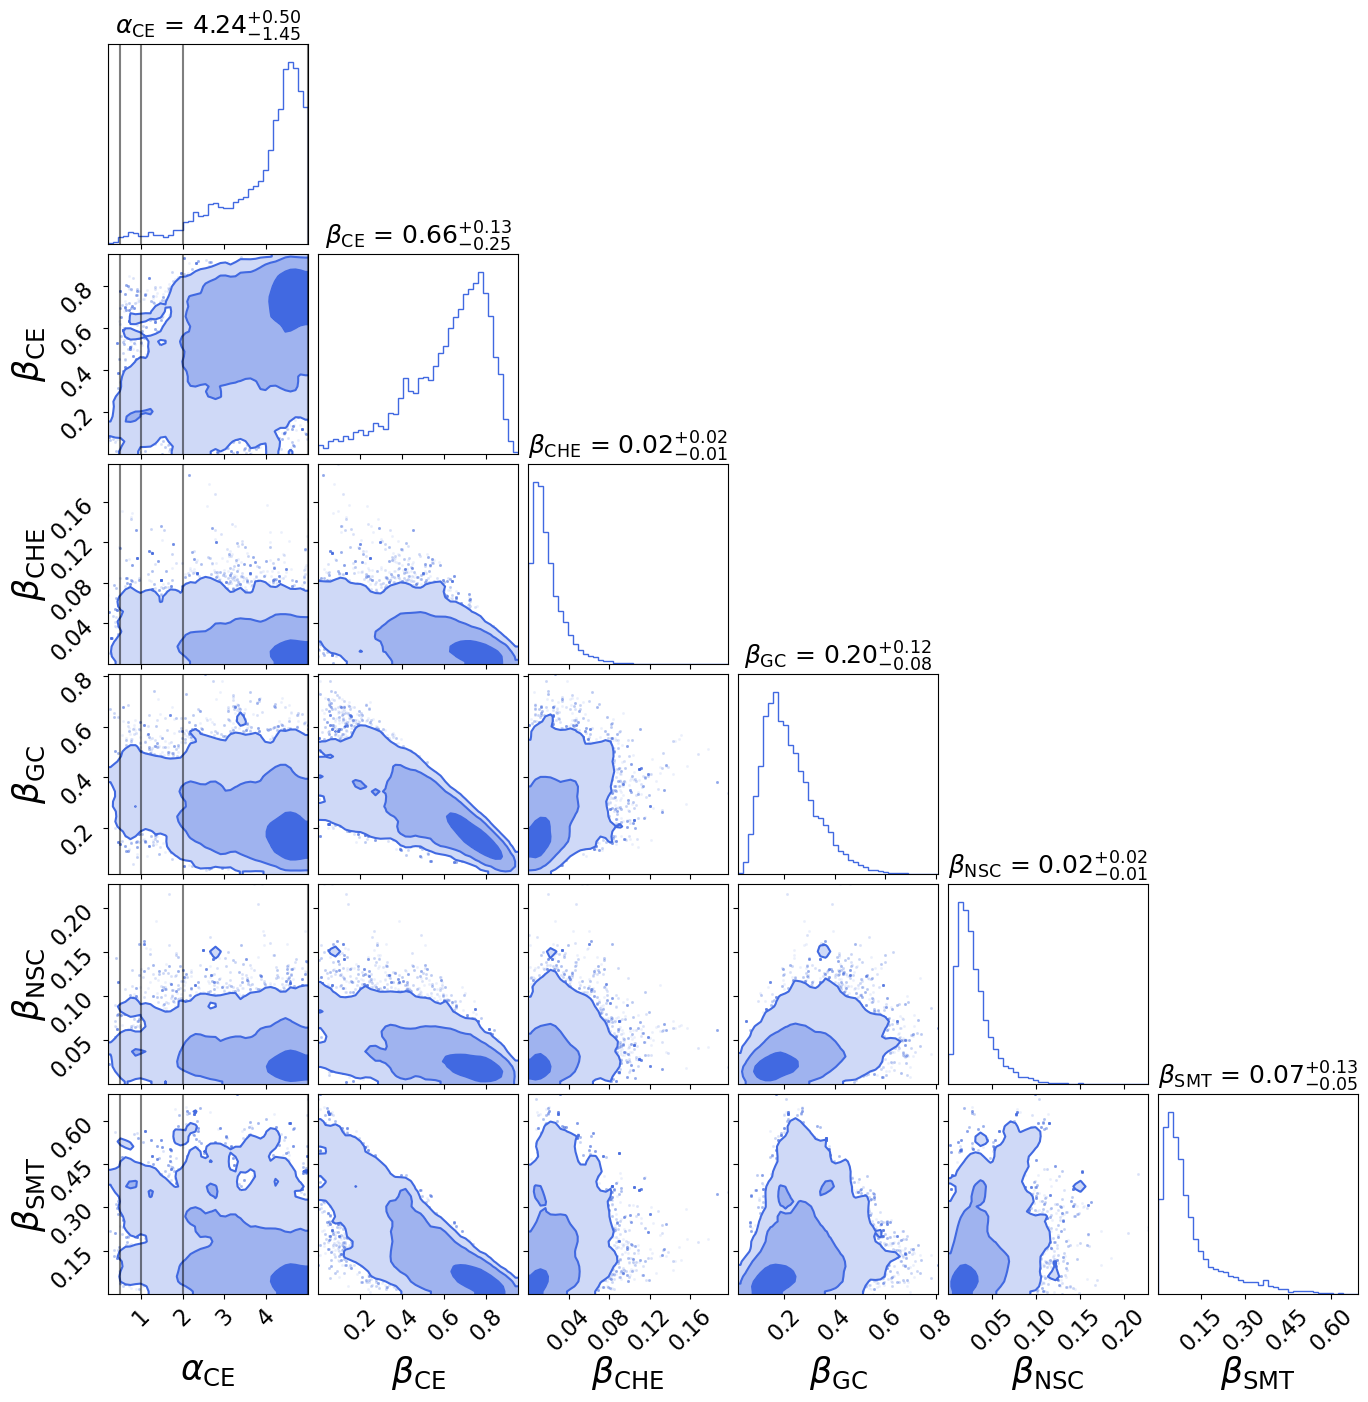

In [12]:
#corner plots of posteriors, without chi_b

plt.rcParams.update({'font.size': 16})
branching_fracs = np.array(flow_file['model_selection']['samples']['block0_values'][:,1:])

corner_kwargs = dict(
    bins=40,
    smooth=0.9,
    color="royalblue",
    #quantiles=[0.16, 0.84],
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.0)),
    plot_density=True,
    plot_datapoints=True,
    fill_contours=True,
    show_titles=True,
    hist_kwargs=dict(density=True),
    label_kwargs=dict(fontsize=25),
    title_kwargs=dict(fontsize=18),
    labels=[r'$\alpha_{\mathrm{CE}}$',r'$\beta_{\mathrm{CE}}$',r'$\beta_{\mathrm{CHE}}$',r'$\beta_{\mathrm{GC}}$',r'$\beta_{\mathrm{NSC}}$',r'$\beta_{\mathrm{SMT}}$'],
    #labels=[r'$\alpha_CE$',r'$\Beta_CE$',r'$\Beta_CHE$',r'$\Beta_GC$',r'$\Beta_NSC$',r'$\Beta_SMT$'],
    #range = [(0.,.5),(0.,5.),(0.,.99),(0.,.99),(0.,.99),(0.,.99),(0.,.99)]
)
fig_data = corner.corner(branching_fracs, **corner_kwargs)


for a in alpha:
    corner.overplot_lines(fig_data, [a, None, None, None, None, None], color='black', alpha=0.5)
#fig_data = corner.corner(dirichlet.pdf(np.ones(5)*0.2, np.ones(5)), fig=fig_data, **corner_kwargs_kde)
#fig_data.savefig('/Users/stormcolloms/Documents/PhD/Project_work/AMAZE_model_selection/rns/Flows_140224_regularisation/plots/BFs_flow_KDEcomp.pdf')

In [5]:
# setup the plots
samples = np.array(flow_file['model_selection']['samples']['block0_values'])
samples = np.reshape(samples, (16,-1,7))
channels = np.array(flow_file['model_selection']['samples']['block0_items'])[:2]

fig = plt.figure(figsize=(10,15))

gs = gridspec.GridSpec(7, 3, wspace=0.3, hspace=0.3)
ax_chains, ax_margs = [], []
for cidx in range(7):
    ax_chains.append(fig.add_subplot(gs[cidx, :2]))
    ax_margs.append(fig.add_subplot(gs[cidx, -1]))


# plot the chains moving in beta space, colored by their model
for chain in samples:
    steps = np.arange(chain.shape[0])
    for i, ax in enumerate(ax_chains):
        ax.scatter(steps, chain[:,i], color='grey', s=0.5, alpha=0.2)

samples_allchains = np.reshape(samples, (samples.shape[0]*samples.shape[1], samples.shape[2]))

for cidx, (ax_chain, ax_marg) in enumerate(zip(ax_chains, ax_margs)):

    ax_margs[cidx].hist(samples_allchains[:,cidx], \
                orientation='horizontal', histtype='step', bins=50, \
                alpha=0.7)

    if cidx != 4:
        ax_chain.set_xticklabels([])
        ax_marg.set_xticklabels([])
    ax_marg.set_yticklabels([])
    ax_chain.tick_params(axis='both', labelsize=16)
    ax_marg.tick_params(axis='both', labelsize=16)

    # legend
    if cidx == 0:
        ax_marg.legend(loc='center', bbox_to_anchor=[1.0,1.0], prop={'size':10})

    if cidx == 6:
        ax_chain.set_xlabel('Step', fontsize=16)
        ax_marg.set_xlabel(r"p($\beta$)", fontsize=16)

    if cidx > 1:
        ax_chain.set_yticks([0,0.5,1.0])
        ax_chain.set_ylabel(r"$\beta$", fontsize=16)
        ax_chain.set_xlim(0,samples.shape[1])
        ax_chain.set_ylim(0,1)
        ax_marg.set_ylim(0,1)
    elif cidx==0:
        ax_chain.set_yticks([0,0.5])
        ax_chain.set_xlim(0,samples.shape[1])
        ax_chain.set_ylim(0,0.5)
        ax_marg.set_ylim(0,0.5)
    elif cidx==1:
        ax_chain.set_yticks([0,5.])
        ax_chain.set_xlim(0,samples.shape[1])
        ax_chain.set_ylim(0,5)
        ax_marg.set_ylim(0,5)


NameError: name 'flow_file' is not defined

In [37]:
samples_allchains.shape

(128000, 7)